## Programmed Calculator about Surplus Change after adding Taxes

### Required input
1. `tax`: how much is the tax will be
2. `kd` & `bd`: for the line Price(Qd)=k*Q+b, what is the slope and intercept
3. `ks` & `bs`: for the line Price(Qs)=k*Q+b, what is the slope and intercept

In [1]:
tax = 7

#P = kQ + b, d for demand, s for supply
kd = -1
bd = 53
ks = 1 / 2 
bs = 10


In [2]:
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
import numpy as np
q, p = symbols('q p')

# Line equation
d_Eq = Eq(q * kd + bd, p)
s_Eq = Eq(q * ks + bs , p)
s_wT_Eq = Eq(q * ks + bs + tax, p)


def P_Qd(quantity_demanded):
    return quantity_demanded * kd + bd

def P_Qs(quantity_supplied):
    return quantity_supplied * ks + bs

### Find Equilibrium for Demand cross Supply

In [3]:
sol = solve((d_Eq,s_Eq), (q, p))
EP = tuple(sol.values())
print('Equilibrium @Q: {:.4f} @P: {:.4f}'.format(float(EP[0]), float(EP[1]))
# print('Equilibrium @Q:', EP[0], '@P:', EP[1])

Equilibrium @Q: 28.6666666666667 @P: 24.3333333333333


### Find Consumer/Producer/Total Surplus

In [11]:
def surplus(EP):
    higher_price = P_Qd(0)
    lower_price = P_Qs(0)
    
    CS = (higher_price - EP[1]) * EP[0] / 2
    PS = (EP[1] - lower_price) * EP[0] / 2
    TS = CS + PS
    return CS, PS, TS
[CS, PS, TS] = surplus(EP)
print('\nSurplus \nCS: {:.4f}\nPS: {:.4f}\nTS: {:.4f}'.format(CS, PS, TS))


Surplus 
CS: 410.8889
PS: 205.4444
TS: 616.3333


### Find Elasticity of Demand and Supply

In [5]:
def elasticity(kd, ks, EP):
    #(Abs of slope of line)^-1 * y / x
    elas_demand = abs(kd) ** -1 * EP[1] / EP[0]
    elas_supply = abs(ks) ** -1 * EP[1] / EP[0]
    return elas_demand, elas_supply

elas = elasticity(kd, ks, EP)

print('\nElasticity of demand at equilibrium: {:.4f}'.format(elas[0]))
print('\nElasticity of supply at equilibrium: {:.4f}'.format(elas[1]))
if elas[0] < elas[1]:
    print("\nElasticity of demand < elas of supply => *** Buyer bear more for tax ***")
else:
    print("\nElasticity of demand > elas of supply => *** Seller bear more for tax ***")


Elasticity of demand at equilibrium: 0.85

Elasticity of supply at equilibrium: 1.70

Elasticity of demand < elas of supply => *** Buyer bear more for tax ***


### Plot the Line of Demand & Supply

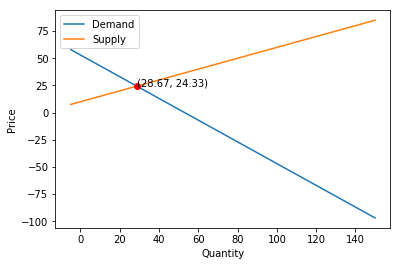

In [6]:
quantity_demanded = np.linspace(-5, 150, 10)
quantity_supplied = np.linspace(-5, 150, 10)
MWTP = P_Qd(quantity_demanded)
MC = P_Qs(quantity_supplied)

plt.plot(quantity_demanded, MWTP, label="Demand")
plt.plot(quantity_supplied, MC, label="Supply")
plt.plot(EP[0], EP[1], 'ro')
plt.text(EP[0], EP[1], '({:.4f}, {:.4f})'.format(EP[0], EP[1]))
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend(loc="upper left")

### Add Tax in and Calculate CS/GS/PS/TS

In [15]:
sol_wT = solve((d_Eq,s_wT_Eq), (q, p))
EP_wT = tuple(sol_wT.values())
Qd_wT = EP_wT[0]

P_at_Qd_wT = P_Qd(Qd_wT)
P_at_Qs_wT = P_Qs(Qd_wT)

CS_wT = (P_Qd(0) - P_at_Qd_wT) * Qd_wT / 2
GS_wT = tax * Qd_wT
PS_wT = (P_at_Qs_wT - P_Qs(0)) * Qd_wT / 2
TS_wT = CS_wT + GS_wT + PS_wT

print('\nQuantity for new Equilibrium: {:.4f}'.format(Qd_wT))
print('\nMarket Price (how much does buyer pay since seller pay tax): {:.4f}'.format(P_at_Qd_wT))
print('How much seller get: {:.4f}'.format(P_at_Qs_wT))


print('\nSurplus before tax \nCS: {:.4f} \nGS: {:.4f} \nPS: {:.4f} \nTS: {:.4f}'.format(CS, 0, PS, TS))
print('\nSurplus with tax \nCS: {:.4f} \nGS: {:.4f} \nPS: {:.4f} \nTS: {:.4f}'.format(float(CS_wT), float(GS_wT), float(PS_wT), float(TS_wT)))
print('\nSurplus Changed\n△CS: {:.4f} \n△GS: {:.4f} \n△PS: {:.4f} \n△TS: {:.4f} '.format(float(CS_wT)-CS, float(GS_wT)-0, float(PS_wT)-PS, float(TS_wT)-TS))

print('\nDWL: {:.4f}'.format((P_at_Qd_wT - P_at_Qs_wT) * (EP[0] - EP_wT[0]) / 2) )

print('\n\nTax total: ', tax)
print('Tax incidence on buyer: {:.4f}'.format(P_at_Qd_wT - EP[1]))
print('Tax incidence on seller: {:.4f}'.format(EP[1] - P_at_Qs_wT))


Quantity for new Equilibrium: 24.0000

Market Price (how much does buyer pay since seller pay tax): 29.0000
How much seller get: 22.0000

Surplus before tax 
CS: 410.8889 
GS: 0.0000 
PS: 205.4444 
TS: 616.3333

Surplus with tax 
CS: 288.0000 
GS: 168.0000 
PS: 144.0000 
TS: 600.0000

Surplus Changed
△CS: -122.8889 
△GS: 168.0000 
△PS: -61.4444 
△TS: -16.3333 

DWL: 16.3333


Tax total:  7
Tax incidence on buyer: 4.6667
Tax incidence on seller: 2.3333
